In [62]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
import jax.numpy as jnp
from jax import jacfwd
from wand.image import Image
from wand.display import display
import json

In [63]:
def feed_forward(a0,w,b):
    a = a0
    num_layers = len(w)
    
    for ℓ in range(num_layers):
        z = np.dot(w[ℓ],a) + b[ℓ]
        a = 1.0/(1.0+np.exp(-z))
    return a

# Part 1

In [64]:
N = [2,1]
w = [np.array([[6,3],[-2,-1]])]
b = [np.array([3, -1.5])]


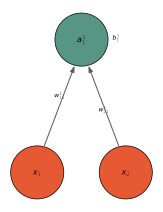

In [65]:
ml4s.draw_network(N)

In [31]:
grid_size = 50
a1 = np.zeros([grid_size,grid_size])  
X0 = np.zeros_like(a1)
X1 = np.zeros_like(a1)

for i in range(grid_size):
    for j in range(grid_size):
        a0 = [i/grid_size-0.5,j/grid_size-0.5]
        a1[i,j] = feed_forward(a0,w,b)[0]
        X0[i,j] = a0[0]
        X1[i,j] = a0[1]

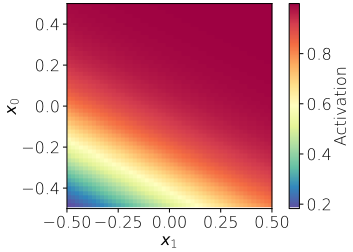

In [32]:
plt.imshow(a1,origin='lower', extent=(-0.5,0.5,-0.5,0.5),  cmap='Spectral_r', rasterized=True)
plt.colorbar(label='Activation')
plt.title('')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_0$');

# Part 2

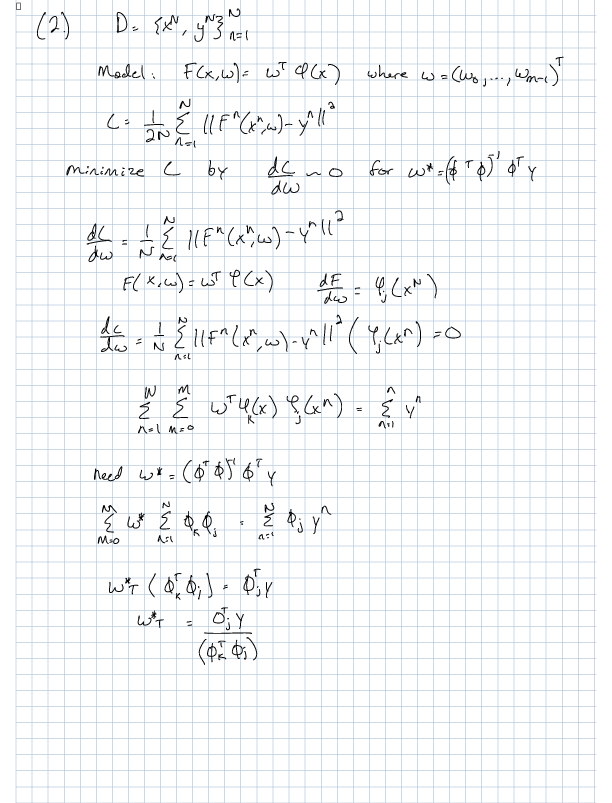

In [11]:
from wand.image import Image as WImage
img = WImage(filename='2_2.pdf')
img

# Part 3

In [66]:
import jax.numpy as jnp
from jax import jacfwd

def model(shift,w):
    return 1.0/((shift-w[0])**2+w[1])

def cost(w,shift,S):
    return 0.5*jnp.average((model(shift,w)-S)**2)

dS_dw = jacfwd(cost,argnums=0)

In [67]:
shift,S = np.loadtxt('./C60_nmr.dat', unpack=True)

Text(0, 0.5, 'S')

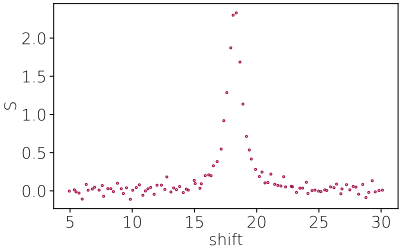

In [68]:
plt.plot(shift,S,'.',ms=4, mec=colors[9], mew=1, mfc='None')
plt.xlabel('shift')
plt.ylabel('S')

In [69]:
η = 0.9
w = np.array([10.,2]) 
num_iter = 100

for i in trange(num_iter):
    w += -η*dS_dw(w,shift,S)

100%|██████████| 100/100 [00:02<00:00, 43.41it/s]


In [70]:
with open('C60_optimal.json', 'w') as outfile:
    json.dump(dict(alpha=float(w[0]), beta=float(w[1]), num_iter=num_iter, eta=η),outfile,indent=1)

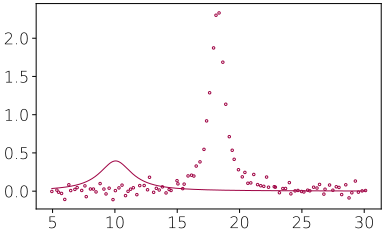

In [71]:
plt.plot(shift,S,'.', ms=5, mec=colors[9], mew=1, mfc='None', label = 'None')

shift_fit = np.linspace(np.min(shift),np.max(shift),1000)
plt.plot(shift_fit,model(shift_fit,w), color=colors[9], lw=1, label=r'$S(\delta) = \frac{1}{(\delta - %4.2f)^2+%4.2f}$'%(w[0],w[1]))